# meringkas berita
berfungsi untuk mengetahui berita secara ringkas

# pembersihan teks

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
import re
import string
import seaborn as sns
import pi

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

nltk.download('stopwords')
nltk.download('punkt_tab')

ModuleNotFoundError: No module named 'pi'

In [14]:
df = pd.read_csv('berita_kompas.csv')
df.head()

,judul,isi,tanggal,kategori
0,"Profil 5 Pimpinan KPK Periode 2024-2029, Didom...","JAKARTA, KOMPAS.com - Komisi III Dewan Perwaki...","Kompas.com - 21/11/2024, 13:51 WIB",Nasional
1,"Profil dan Harta Benny Mamoto, Dewas KPK Perio...","JAKARTA, KOMPAS.com - Komisi III DPR RI akhirn...","Kompas.com - 21/11/2024, 13:50 WIB",Nasional
2,Bareskrim Polri Tangkap 1 Buron Kasus Judol Si...,"JAKARTA, KOMPAS.com - Direktorat Tindak Pidana...","Kompas.com - 21/11/2024, 13:44 WIB",Nasional
3,"Berpegang pada Prinsip GCG, KAI Pastikan Layan...",KOMPAS.com - Vice President (VP) Public Relati...,"Kompas.com - 21/11/2024, 13:44 WIB",Nasional
4,Ridwan Kamil Janji Buka Rincian APBD ke Publik...,"JAKARTA, KOMPAS.com - Calon gubernur Jakarta n...","Kompas.com - 21/11/2024, 13:42 WIB",Megapolitan


preprocessing

In [15]:
def preptext(text):
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Menghapus https* and www*
    text = re.sub(r'[\s]+', ' ', text) # Menghapus tambahan spasi
    text = re.sub(r"[^a-zA-Z :\.]", "", text) # Menghapus tanda baca
    text = re.sub(r'\d+', '', text)
    words = word_tokenize(text.lower())

    sw = set(stopwords.words("indonesian"))
    words = [word for word in words if word not in sw]
    return ' '.join(words)


In [16]:
df['isi_baru'] = df['isi'].apply(preptext)

memisahka kalimat berita

In [17]:
kalimat = nltk.sent_tokenize(df['isi_baru'][1])
print(kalimat)

['jakarta kompas.com komisi iii dpr ri memilih anggota dewan pengawas dewas komisi pemberantasan korupsi kpk periode .', 'salah satunya benny mamoto .', 'nama benny mamoto terpilih hasil voting pemungutan suara merampungkan uji kelayanan kepatutan fit and proper test ruang komisi iii dpr kompleks parlemen senayan jakarta kamis .', 'hasil voting anggota dewas suara wisnu baroto benny jozua mamoto gusrizal .', 'sumpeno chisca mirawati .', 'benny mamoto suara proses pemungutan suara .', 'berdasarkan suara diperoleh berdasarkan mekanisme pengambilan suara voting komisi iii dpr ri memilih merekomendasikan calon dewan pengawas kpk jabatan habiburokhman rapat pleno ruang rapat komisi iii dpr kompleks parlemen jakarta kamis siang .', 'baca : komisi iii dpr tetapkan anggota dewas kpk namanamanya pemilik nama lengkap benny jozua mamoto menempuh pendidikan akademi kepolisian akpol lulus .', 'benny mamoto berkuliah fakultas hukum universitas krisnadwipayana meraih gelar s .', 'gelar s s benny stud

TF-IDF

In [18]:
vectorizer = TfidfVectorizer()
tfidf_berita = vectorizer.fit_transform(kalimat)

fitur = vectorizer.get_feature_names_out()
tfidf_hasil = pd.DataFrame(data=tfidf_berita.toarray(), columns=fitur)
tfidf_hasil

,agustus,akademi,akpol,and,anggota,antiteror,baca,bareskrim,baroto,benny,...,tetapkan,ui,uji,undangundang,unit,universitas,voting,wakil,widodo,wisnu
0,0.000000,0.000000,0.000000,0.000000,0.189820,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.274075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.228756,0.000000,0.000000,0.000000,0.000000,0.000000,0.097752,...,0.000000,0.000000,0.228756,0.000000,0.000000,0.000000,0.182091,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.254584,0.000000,0.000000,0.000000,0.376225,0.160768,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.299478,0.000000,0.000000,0.376225
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.205119,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140127,0.000000,0.000000,0.000000
7,0.000000,0.258441,0.258441,0.000000,0.174881,0.000000,0.205721,0.000000,0.000000,0.110437,...,0.258441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161719,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.333290,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161021,...,0.000000,0.376816,0.000000,0.000000,0.000000,0.331851,0.000000,0.000000,0.000000,0.000000


Cosine similaritas

In [19]:
cosine = cosine_similarity(tfidf_berita, tfidf_berita)

similaritas = pd.DataFrame(cosine, index=range(len(kalimat)), columns=range(len(kalimat)))
similaritas

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.000000,0.000000,0.163037,0.096650,0.0,0.000000,0.395448,0.237845,0.000000,0.000000,...,0.0,0.191606,0.124716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187239
1,0.000000,1.000000,0.063221,0.103977,0.0,0.132661,0.000000,0.071425,0.104592,0.044132,...,0.0,0.111610,0.134171,0.000000,0.000000,0.036822,0.042480,0.000000,0.126705,0.100717
2,0.163037,0.063221,1.000000,0.204272,0.0,0.249617,0.335636,0.157002,0.037304,0.015740,...,0.0,0.082108,0.047853,0.000000,0.000000,0.013133,0.015151,0.000000,0.045191,0.074094
3,0.096650,0.103977,0.204272,1.000000,0.0,0.270470,0.112618,0.206352,0.061352,0.025887,...,0.0,0.065469,0.204153,0.000000,0.000000,0.021599,0.024918,0.000000,0.074323,0.184639
4,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.132661,0.249617,0.270470,0.0,1.000000,0.180287,0.053455,0.078277,0.033028,...,0.0,0.083529,0.100414,0.000000,0.000000,0.027558,0.031793,0.000000,0.094827,0.075377
6,0.395448,0.000000,0.335636,0.112618,0.0,0.180287,1.000000,0.152694,0.000000,0.000000,...,0.0,0.065105,0.079783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.128774
7,0.237845,0.071425,0.157002,0.206352,0.0,0.053455,0.152694,1.000000,0.042145,0.069727,...,0.0,0.148432,0.208714,0.000000,0.000000,0.014837,0.017117,0.000000,0.051055,0.272763
8,0.000000,0.104592,0.037304,0.061352,0.0,0.078277,0.000000,0.042145,1.000000,0.247245,...,0.0,0.065856,0.079168,0.000000,0.000000,0.021727,0.025066,0.000000,0.074763,0.059428
9,0.000000,0.044132,0.015740,0.025887,0.0,0.033028,0.000000,0.069727,0.247245,1.000000,...,0.0,0.108955,0.033404,0.000000,0.000000,0.021633,0.024958,0.000000,0.165532,0.025075


Graph

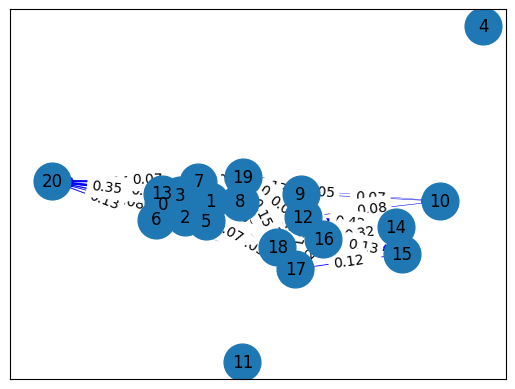

In [20]:
graph = nx.DiGraph()
for i in range(len(cosine)):
    graph.add_node(i)

for i in range(len(kalimat)):
    for j in range(i+1, len(kalimat)): 
        if cosine[i, j] > 0:  
            graph.add_edge(i, j, weight=cosine[i, j])



pos = nx.spring_layout(graph, seed=42)
nx.draw_networkx_nodes(graph, pos, node_size=700)
edges = nx.draw_networkx_edges(
    graph, pos, 
    edge_color='blue', 
    width=[graph[u][v]['weight'] * 5 for u, v in graph.edges()]
)
nx.draw_networkx_labels(graph, pos)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels={(u, v): f'{w:.2f}' for u, v, w in graph.edges(data='weight')})

plt.show()

## matrix sentralitas

closeness centrality

In [21]:
closeness_word = nx.closeness_centrality(graph)

sorted_closeness_preprocessing = sorted(closeness_word.items(), key=lambda x: x[1], reverse=True)
print("Closeness Centrality:")
for node, closeness in sorted_closeness_preprocessing:
    print(f"Node {node}: {closeness:.4f}")

Closeness Centrality:
Node 20: 0.7364
Node 19: 0.6568
Node 17: 0.5921
Node 16: 0.5765
Node 13: 0.5042
Node 12: 0.5000
Node 15: 0.3674
Node 18: 0.3657
Node 9: 0.3200
Node 7: 0.3000
Node 14: 0.2881
Node 8: 0.2722
Node 10: 0.2531
Node 6: 0.2083
Node 5: 0.1600
Node 3: 0.1500
Node 2: 0.1000
Node 0: 0.0000
Node 1: 0.0000
Node 4: 0.0000
Node 11: 0.0000


In [22]:
rangkuman = ""
print("Tiga Node Tertinggi Closeness Centrality Menggunakan Preprocessing:")
for node, closeness_word in sorted_closeness_preprocessing[:3]:
    top_sentence = kalimat[node]
    rangkuman += top_sentence + " "
    print(f"Node {node}: Closeness Centrality = {closeness_word:.4f}")
    print(f"Kalimat: {top_sentence}\n")

Tiga Node Tertinggi Closeness Centrality Menggunakan Preprocessing:
Node 20: Closeness Centrality = 0.7364
Kalimat: baca : anggota dpr singgung pernyataan kontroversial calon dewas kpk benny mamoto sambo

Node 19: Closeness Centrality = 0.6568
Kalimat: benny mamoto dipercaya wakil sekretaris ncbinterpol indonesia .

Node 17: Closeness Centrality = 0.5921
Kalimat: dikutip laman resmi kompolnas benny menjabat dit ikamtrannas bareskrim polri .



membuat rangkuman dengan page rank

In [23]:
ranked_page = nx.pagerank(graph)

sorted_page= sorted(ranked_page.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, ranked_page in sorted_page:
    print(f"Node {node}: {ranked_page:.4f}")

Page Rank :
Node 20: 0.1959
Node 19: 0.1289
Node 17: 0.0932
Node 18: 0.0708
Node 16: 0.0650
Node 12: 0.0603
Node 13: 0.0470
Node 15: 0.0359
Node 7: 0.0357
Node 6: 0.0313
Node 14: 0.0309
Node 9: 0.0292
Node 5: 0.0252
Node 8: 0.0228
Node 10: 0.0222
Node 3: 0.0213
Node 2: 0.0189
Node 0: 0.0164
Node 1: 0.0164
Node 4: 0.0164
Node 11: 0.0164


In [26]:
import pickle

# Load model and vectorizer from the pickle file
with open('logistic_regression_and_vectorizer.pkl', 'rb') as file:
    loaded_objects = pickle.load(file)

model = loaded_objects['model']
vectorizer = loaded_objects['vectorizer']

In [27]:
ringkasan_pagerank = ""
print("Tiga Node Tertinggi Page Rank Menggunakan Preprocessing dan Prediksi Kategori:")
for node, pagerank_preprocessing in sorted_page[:140]:
    top_sentence = kalimat[node]
    ringkasan_pagerank += top_sentence + " "
    
    # Prediksi kategori menggunakan model logistic regression
    vectorized_sentence = vectorizer.transform([top_sentence])
    predicted_category = model.predict(vectorized_sentence)[0]
    
    print(f"Node {node}: Page Rank = {pagerank_preprocessing:.4f}")
    print(f"Kalimat: {top_sentence}")
    print(f"Kategori: {predicted_category}\n")



Tiga Node Tertinggi Page Rank Menggunakan Preprocessing dan Prediksi Kategori:
Node 20: Page Rank = 0.1959
Kalimat: baca : anggota dpr singgung pernyataan kontroversial calon dewas kpk benny mamoto sambo
Kategori: Nasional

Node 19: Page Rank = 0.1289
Kalimat: benny mamoto dipercaya wakil sekretaris ncbinterpol indonesia .
Kategori: Nasional

Node 17: Page Rank = 0.0932
Kalimat: dikutip laman resmi kompolnas benny menjabat dit ikamtrannas bareskrim polri .
Kategori: Nasional

Node 18: Page Rank = 0.0708
Kalimat: setelahnya wakil direktur iiekonomi khusus bareskrim .
Kategori: Nasional

Node 16: Page Rank = 0.0650
Kalimat: menjabat ketua harian kompolnas benny penyidik densus antiteror polri kepala unit ikeamanan negaraseparatis .
Kategori: Nasional

Node 12: Page Rank = 0.0603
Kalimat: benny mamoto dipercaya menjabat ketua harian komisi kepolisian nasional kompolnas periode .
Kategori: Nasional

Node 13: Page Rank = 0.0470
Kalimat: baca : calon anggota dewas benny mamoto ott kpk diatur

hasil rangkuman

In [ ]:
ringkasan_pagerank = ""
print("Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:")
for node, pagerank_preprocessing in sorted_page[:3]:
    top_sentence = kalimat[node]
    ringkasan_pagerank += top_sentence + " "
    print(f"Node {node}: Page Rank = {pagerank_preprocessing:.4f}")
    print(f"Kalimat: {top_sentence}\n")

Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:
Node 14: Page Rank = 0.1851
Kalimat: fraksi dpr membahas mendalam aspek terkait ruu .

Node 13: Page Rank = 0.1422
Kalimat: baca : jokowi komisi iii ruu perampasan aset disahkan politikus partai nasdem mengeklaim keterbatasan kendala utama mengesahkan ruu perampasan aset .

Node 11: Page Rank = 0.0960
Kalimat: jokowi ruu perampasan aset diselesaikan .

